$$Conceito:$$



**Tipos de Redes Neurais Não Supervisionadas:**

**Máquinas de Boltzmann:**


- Rede neural Feed Forward de uma camada, com intuito de ajustar os pesos até que consiga reconstruir as variáveis de entrada com menos dimensões.


-  Objetivo é de aprender a distribuição de probabilidades dos inputs, usando a função de ativação, o Y é devolvido para camada oculta para reconstrução da variável e através do threshold determinar se o neurônio deve ser ativado ou não, no final é comparado o valor reconstruído com o valor original para que assim consiga atualizar os pesos


- Características: Não possui camada de saída, Entradas são passadas para a camada escondida, agrupa os dados de entrada



-  **Máquina Restrita de Boltzmann** = Não liga os neurônios de cada camada entre eles mesmos



- **Divergência Contrastiva:** Aprendizado da máquina de Boltzamnn é feito pela Divergência Contrastiva, que é uma técnica de treinamento alternativa para aproximar a inclinação gráfica que representa a relação entre os pesos de uma rede e seu erro, chamada de gradiente. Como a maioria dos algoritmos de aprendizado probabilístico tenta otimizar o valor da probabilidade logarítmica, esse gradiente representa a direção desejada de mudança, de aprendizado, para os parâmetros da rede.

- **Funcionamento:** A diferença entre entrada e r é verificada pela divergência de Kullback-Leibler(Distribuição de probabilidade), fase positiva(esquerda para direita) e fase negativa(direita para esquerda)


- **Denoising:** Aplica um ruido nos dados, alterando seus valores, executar o método quando houver problemas com overfitting


**Deep Belief Networks(DBN):**

- Empilhar máquinas restritas de Bolztamnn(RBM)


- Cada modelo RBM realiza uma transformação não linear em seus vetores de entrada e produz como vetores de saída as novas features que servirão de entrada para o próximo modelo RBM na sequência.


- Podem ser usadas em uma configuração não supervisionada ou supervisionada.


- Precisamente, no aprendizado de recursos, fazemos pré-treinamento camada por camada de forma não supervisionada sobre os diferentes RBMs que formam um DBN e usamos técnica de backpropagation (ou seja, descida do gradiente) para fazer classificação e outras tarefas.


**AutoEncoder(AE):**


- Os Autoencoders são uma técnica de aprendizado não supervisionado, na qual usamos as redes neurais para a tarefa de aprendizado de representação. Especificamente, projetaremos uma arquitetura de rede neural de modo que força uma representação de conhecimento compactada da entrada original. Se os recursos de entrada fossem independentes um do outro, essa compressão e reconstrução subsequente seriam uma tarefa muito difícil. No entanto, se houver algum tipo de estrutura nos dados (ou seja, correlações entre os recursos de entrada), essa estrutura poderá ser aprendida, muito semelhante aos PCAs 


- **Codificador (Encoder):** é a parte da rede que compacta a entrada em uma representação de espaço latente (codificando a entrada).


- **Decodificador (Decoder)**: Esta parte tem como objetivo reconstruir a entrada da representação do espaço latente.


- **Tipos de AutoEncoder:**


-  **Deep Autoencoder** = Redes AE com mais de uma camada escondida


-  **Autoencoder Esparso** = Quando os neurônios das camadas escondidas tem mais quantidade do que na camada de entrada

- **Problemas com a rede Autoencoder Esparso:** **Overfitting**, Dados aprende demais com os dados de treino, esses problemas impedem a reconstrução correta dos dados

- **Soluções:** **Regularização** = Método **Dropout** , arquitetura própria para resolver os problemas citado acima, quando apagamos aleatoriamente o número de neurônio da camada escondida para ter menos neurônios do que na camada de entrada.

- **Autoencoder Denoising** = Aplicar um ruido nos modelos com overfitting, aumenta a capacidade de generalizar os dados, inclui penalidade nos dados de treinamento 

- **Autoencoder Contrativo** = Diferença com relação ao denoising – inclui penalidade na função custo com isso pode ter resultados melhores do que o Denoising


**Redes Adversárias Generativas(GAN):**


- Redes Adversárias Generativas (GANs) são arquiteturas de redes neurais profundas compostas por duas redes colocadas uma contra a outra (daí o nome “adversárias”), são elas Generativas e Discriminativas

- Algoritmos Discriminativos tentam classificar os dados de entrada; isto é, dados os recursos de uma instância de dados, eles prevêem um rótulo ou categoria à qual esses dados pertencem. Iguais aos modelos supervisionados de ML

- As Redes Adversárias Generativas pertencem ao conjunto de modelos generativos. Isso significa que eles são capazes de produzir / gerar novo conteúdo, Em vez de prever um rótulo com determinados recursos, eles tentam prever os recursos(X) com um determinado rótulo(Y).

- Enquanto uma das redes Generativas gera novas instâncias de dados, a discriminadora, avalia sua autenticidade; ou seja, o discriminador decide se cada instância de dados que ele analisa pertence ou não ao conjunto de dados de treinamento real.


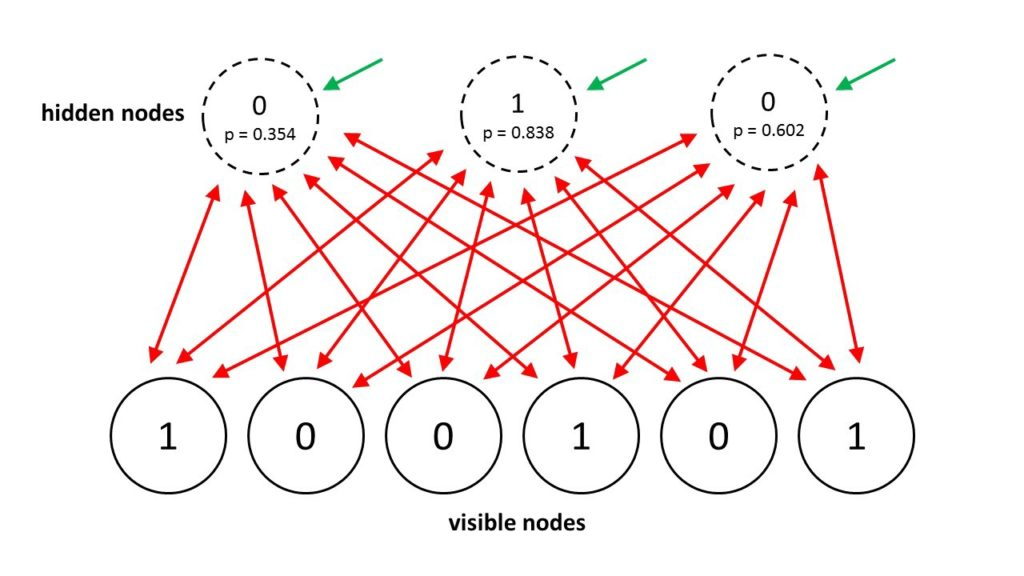

In [1]:
#Máquinas de Boltzmann
from IPython.display import Image
Image(filename="mb.jpg")

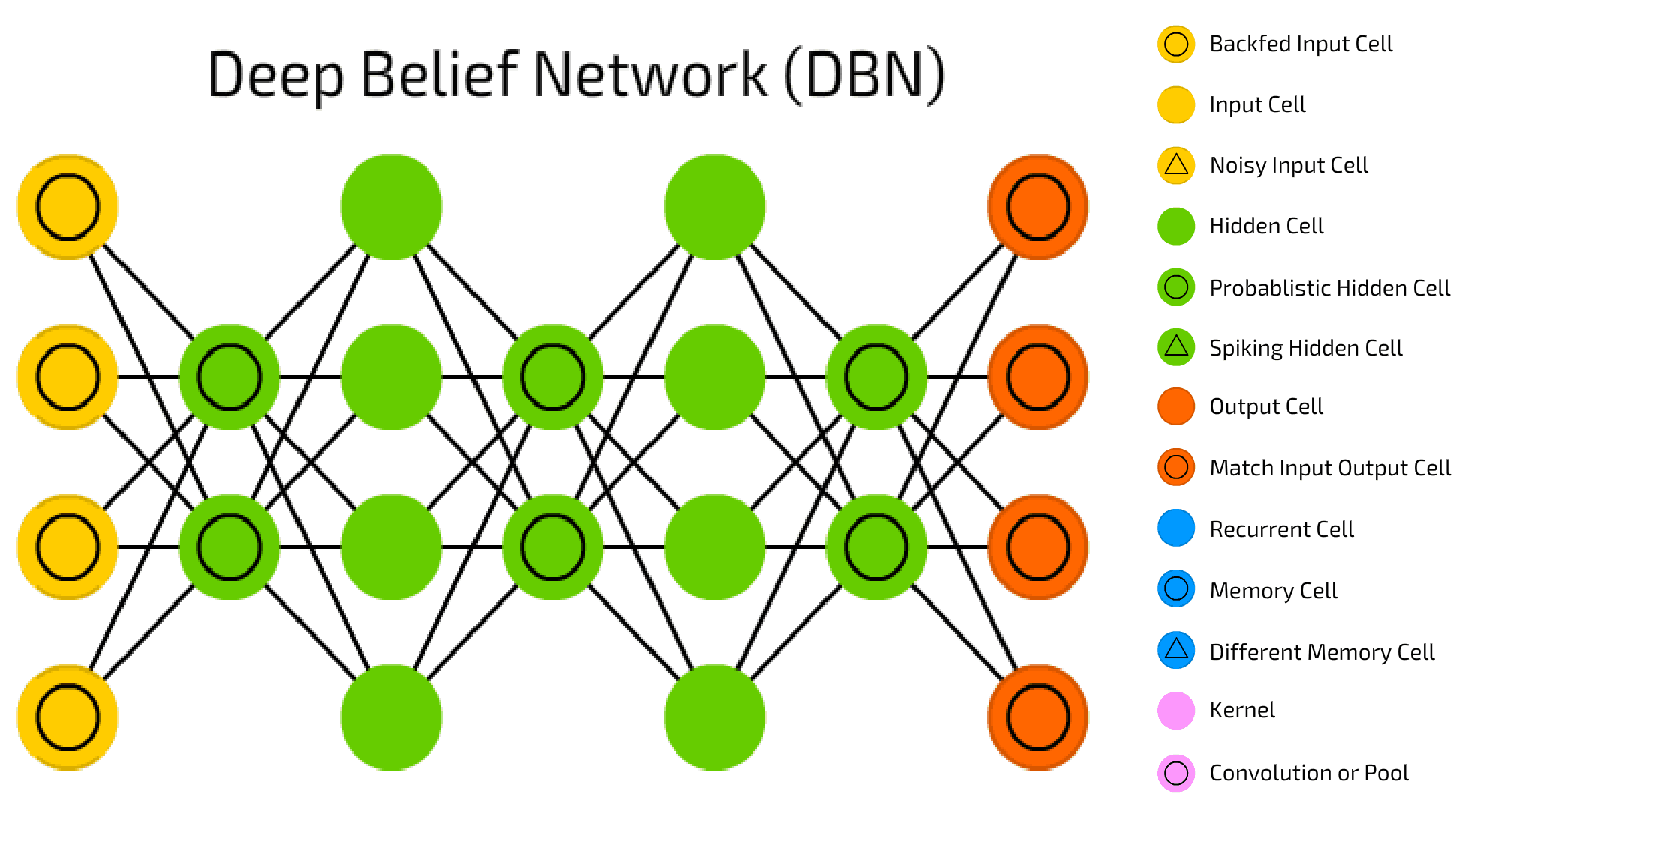

In [2]:
from IPython.display import Image
Image(filename="DBN.PNG")

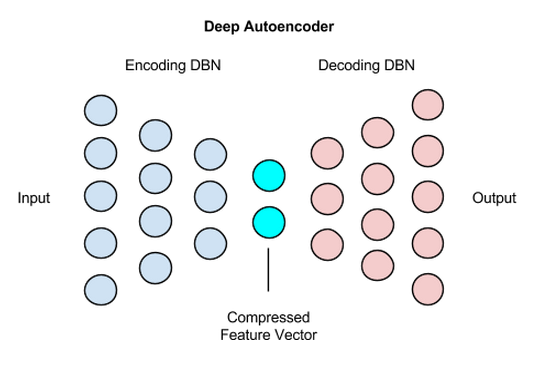

In [3]:
from IPython.display import Image
Image(filename="deep_autoencoder.PNG")

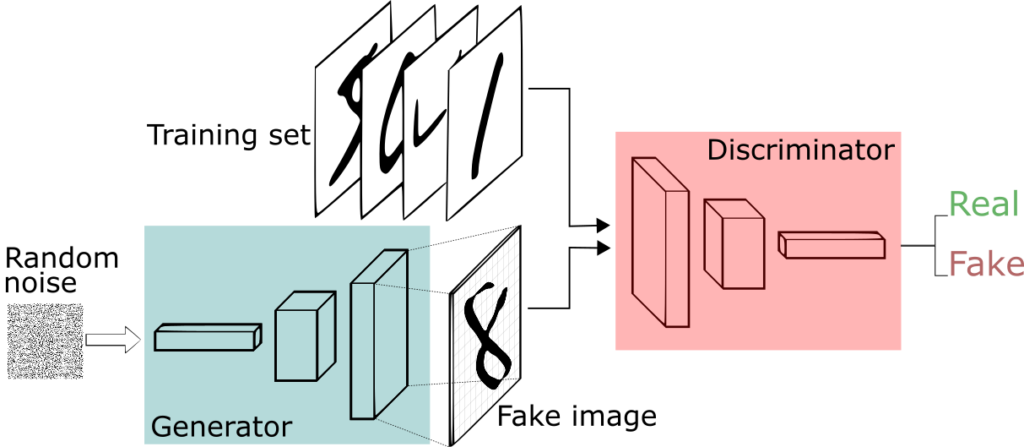

In [4]:
#GANs
from IPython.display import Image
Image(filename="GANs.PNG")

In [5]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
import numpy as np
import time
from sklearn import linear_model, datasets, metrics
import matplotlib.pyplot as plt
import pandas as pd

# Banco de dados de imagens

In [6]:
X, y = datasets.load_digits(return_X_y=True)
print(f'Array de pixels:\n {X}')
print(f'\nShape dos dados: {X.shape}')

Array de pixels:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

Shape dos dados: (1797, 64)


**Banco de dados em formato de array com shape de 1797 imagens com 64 colunas (8 x 8)**

**OBS: A raiz² do shape das colunas é o tamanho dos pixels de cada imagens, EX: raiz(64) = 8, então os pixels são 8 X 8**

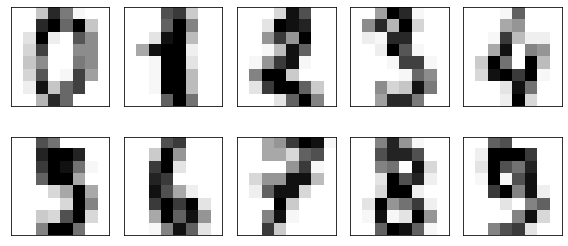

In [7]:
#Verificar a imagem de todos os numeros manuscritos
plt.figure(figsize=(8,4))

for i in range(10):
    
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(8,8), cmap='Greys')
plt.tight_layout()

In [8]:
# Variável Target
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Verificando na imagens e na variável target, temos um range de numero de 0 a 9**

In [9]:
#Tipos de dados
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

**Todas as colunas contém dados do tipo float**

In [10]:
#Describe
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [11]:
#Padronizar os dados
X_padro = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001) # 0-1 escala
pd.DataFrame(X_padro).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.037979,0.325297,0.739735,0.740500,0.361364,0.085141,0.008644,0.002782,0.124617,...,0.232817,0.015881,0.000556,0.031039,0.347348,0.755560,0.738066,0.422751,0.129242,0.022781
std,0.0,0.113398,0.297175,0.265551,0.267960,0.354149,0.207860,0.069158,0.047108,0.199759,...,0.307461,0.075723,0.023588,0.103810,0.318937,0.273417,0.308370,0.368787,0.255658,0.116257
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.062500,0.624996,0.624996,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.062500,0.687496,0.624996,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.249998,0.812495,0.812495,0.249998,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.000000,0.249998,0.812495,0.874995,0.374998,0.000000,0.000000
75%,0.0,0.000000,0.562496,0.937494,0.937494,0.687496,0.000000,0.000000,0.000000,0.187499,...,0.437497,0.000000,0.000000,0.000000,0.624996,0.999994,0.999994,0.749995,0.124999,0.000000
max,0.0,0.999988,0.999994,0.999994,0.999994,0.999994,0.999994,0.999993,0.999950,0.999994,...,0.999994,0.999992,0.999900,0.999989,0.999994,0.999994,0.999994,0.999994,0.999994,0.999994


**Padronizamos os dados para diminuir o desvio padrão entre eles**

# Modelo 1 - Rede Neural Boltzmann

- Aplicar redução de dimensionalidade com a rede neural Boltzmann


- O Algoritimo BernoulliRBM é binário, portanto seu resultado é 0 ou 1


In [12]:
#Rede neural Boltzmann
rede1 = BernoulliRBM(n_components=100, learning_rate=0.01, batch_size=10, n_iter=40, verbose=True, random_state=None)
rede1.fit(X_padro)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -26.33, time = 0.07s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -26.33, time = 0.07s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.29, time = 0.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -24.69, time = 0.07s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -24.96, time = 0.08s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -26.17, time = 0.07s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -26.19, time = 0.08s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -25.54, time = 0.05s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -24.67, time = 0.07s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -26.58, time = 0.06s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -25.16, time = 0.05s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -25.48, time = 0.06s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -24.82, time = 0.07s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -24.82, time = 0.05s
[BernoulliRBM] Iteration 15, 

BernoulliRBM(learning_rate=0.01, n_components=100, n_iter=40, verbose=True)

In [13]:
#Shape Original
X_padro.shape

(1797, 64)

In [14]:
#Shape após o treinamento da rede
rede1.components_.shape

(100, 64)

**Dimensões dos dados após a redução: 100 x 64**

In [15]:
#Probabilidades de ativação da camada oculta
rede1.transform(X_padro)

array([[0.5289268 , 0.29566904, 0.76059171, ..., 0.43806254, 0.35669152,
        0.61052116],
       [0.49282362, 0.66681663, 0.34262117, ..., 0.50461993, 0.65124458,
        0.3436354 ],
       [0.37972144, 0.55001098, 0.35884983, ..., 0.45458806, 0.61114085,
        0.40222933],
       ...,
       [0.5012086 , 0.58202873, 0.41014636, ..., 0.47206109, 0.60883416,
        0.45464283],
       [0.37704754, 0.36969073, 0.72327122, ..., 0.4763225 , 0.49554904,
        0.50322272],
       [0.24362416, 0.4425646 , 0.41670562, ..., 0.3854333 , 0.57505405,
        0.44532887]])

In [16]:
#Matriz de pesos
pd.DataFrame(rede1.components_)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.141699,-0.142013,-0.056924,0.003868,0.134459,0.206994,0.248995,0.023520,-0.124425,-0.170115,...,-0.475439,-0.204826,-0.144913,-0.121634,-0.035535,0.007792,-0.313768,-0.465299,-0.405082,-0.223934
1,-0.149473,0.003908,0.032830,0.054945,0.028785,0.035524,0.031324,-0.071504,-0.098112,-0.008857,...,-0.137171,-0.074581,-0.139498,-0.017068,0.043115,0.032169,-0.113371,-0.114475,-0.050392,-0.047592
2,-0.147175,-0.098641,0.030068,0.062070,0.169108,0.245900,0.174191,-0.034301,-0.121063,-0.036650,...,-0.224594,-0.181274,-0.127186,-0.109862,0.048184,0.096731,-0.104890,-0.187316,-0.304874,-0.198841
3,-0.156588,-0.122418,-0.059071,0.009862,-0.002719,-0.072830,-0.134576,-0.112480,-0.124052,-0.087277,...,0.017768,-0.095863,-0.144044,-0.121853,-0.065605,0.008405,0.081092,0.023483,-0.047841,-0.104136
4,-0.148827,-0.201699,-0.174493,-0.076254,-0.012987,-0.116110,-0.143779,-0.112335,-0.123440,-0.205756,...,-0.034426,-0.097101,-0.162577,-0.178941,-0.183824,-0.089717,0.076318,-0.016526,-0.096212,-0.148591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.148303,-0.157578,-0.133935,-0.078967,0.028612,-0.013755,-0.060748,-0.090830,-0.120359,-0.142940,...,-0.033097,-0.088800,-0.145006,-0.163863,-0.143077,-0.075621,0.084635,0.020077,-0.082906,-0.118682
96,-0.156722,-0.095478,-0.072462,-0.013804,0.067289,0.069602,0.085157,-0.050250,-0.124713,-0.131960,...,-0.256253,-0.122849,-0.140206,-0.090680,-0.064228,-0.032319,-0.149565,-0.223913,-0.182282,-0.128463
97,-0.139231,-0.081677,-0.035102,-0.006895,0.064534,0.083385,0.067169,-0.072865,-0.106372,-0.074060,...,-0.153590,-0.127963,-0.148817,-0.074138,-0.028014,-0.010456,-0.079174,-0.109455,-0.141739,-0.122035
98,-0.154550,-0.080708,-0.070181,-0.027789,-0.014337,-0.090182,-0.137480,-0.123321,-0.113131,-0.067925,...,0.051557,-0.053061,-0.138132,-0.075429,-0.079138,-0.051023,0.100824,0.103143,0.053001,-0.039888


In [17]:
#Probabilidade do erro na construção dos dados de cada linha em compração com os dados originais
pd.DataFrame(rede1.score_samples(X_padro)).mean()

0   -21.619114
dtype: float64

**Média do erro de todas as variáveis**

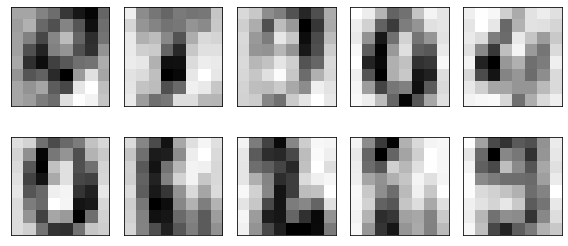

In [18]:
#Verificar a imagem com as novas dimensões
plt.figure(figsize=(8,4))

for i in range(10):
    
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(rede1.components_[i].reshape(8,8), cmap='Greys')
plt.tight_layout()

# Modelo 2 - Rede Neural Boltzmann + Regressão Logistica

- Vamos usar Rede Neural de Boltzmann para fazer a redução de dimensionalidade dos dados e o algoritimo de Regressão Logistica para prever o resultado

In [19]:
#Separar os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split( X_padro, y, test_size=0.2, random_state=0)

In [20]:
# Modelos
rede2 = BernoulliRBM(n_components=100, learning_rate=0.01, batch_size=10, n_iter=200, verbose=True, random_state=0)
logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1,C=50)

#Criar um Pipeline para sequencia do treinamento dos modelos
rbm_features_classifier = Pipeline(steps=[("rede2", rede2), ("logistic", logistic)])

#Treinar os modelos
rbm_features_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -26.48, time = 0.05s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -26.27, time = 0.09s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -26.09, time = 0.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -26.12, time = 0.18s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -26.16, time = 0.17s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -25.97, time = 0.19s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -26.14, time = 0.10s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -26.05, time = 0.14s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -26.05, time = 0.13s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -26.06, time = 0.12s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -26.07, time = 0.09s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -25.97, time = 0.10s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -25.87, time = 0.12s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -25.83, time = 0.10s
[BernoulliRBM] Iteration 15, 

[BernoulliRBM] Iteration 118, pseudo-likelihood = -20.81, time = 0.15s
[BernoulliRBM] Iteration 119, pseudo-likelihood = -20.95, time = 0.09s
[BernoulliRBM] Iteration 120, pseudo-likelihood = -20.84, time = 0.11s
[BernoulliRBM] Iteration 121, pseudo-likelihood = -20.83, time = 0.10s
[BernoulliRBM] Iteration 122, pseudo-likelihood = -20.84, time = 0.07s
[BernoulliRBM] Iteration 123, pseudo-likelihood = -20.64, time = 0.06s
[BernoulliRBM] Iteration 124, pseudo-likelihood = -20.77, time = 0.05s
[BernoulliRBM] Iteration 125, pseudo-likelihood = -20.83, time = 0.06s
[BernoulliRBM] Iteration 126, pseudo-likelihood = -20.74, time = 0.14s
[BernoulliRBM] Iteration 127, pseudo-likelihood = -20.68, time = 0.12s
[BernoulliRBM] Iteration 128, pseudo-likelihood = -20.70, time = 0.10s
[BernoulliRBM] Iteration 129, pseudo-likelihood = -20.74, time = 0.16s
[BernoulliRBM] Iteration 130, pseudo-likelihood = -20.52, time = 0.06s
[BernoulliRBM] Iteration 131, pseudo-likelihood = -20.57, time = 0.06s
[Berno

Pipeline(steps=[('rede2',
                 BernoulliRBM(learning_rate=0.01, n_components=100, n_iter=200,
                              random_state=0, verbose=True)),
                ('logistic',
                 LogisticRegression(C=50, solver='newton-cg', tol=1))])

In [21]:
#Resultado
Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred))
)

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.91      0.90        35
           2       1.00      0.89      0.94        36
           3       0.93      0.97      0.95        29
           4       1.00      0.97      0.98        30
           5       0.97      0.95      0.96        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.90      0.90      0.90        39
           9       0.93      0.93      0.93        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360




# Modelo 3 - Regressão Logistica

- O modelo de Regressão logistica vai ser comparado com o modelo 2, que houve redução de dimensionalidade

In [22]:
#Modelo 3
logistic_mod3 = linear_model.LogisticRegression(solver="newton-cg", tol=1,C=50)
logistic_mod3.fit(X_train,Y_train)

LogisticRegression(C=50, solver='newton-cg', tol=1)

In [23]:
#Previsão
Y_pred1 = logistic_mod3.predict(X_test)

In [24]:
#Resultado 
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred1))
)

Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.95      0.92      0.94        39
           9       0.89      0.95      0.92        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




# Conclusão:

**O Resultado dos 2 modelos são parecidos, isso mostra que a redução de dimensionalidade feita no modelo 2 praticamente não perdeu nenhuma informação**

# Rede Neural Autoencoder 

## Objetivo: Reproduir uma imagem usando a Rede Neural Autoencoder

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, Input, Conv2DTranspose
from tensorflow.keras.models import Sequential
import cv2
from keras_preprocessing.image import img_to_array
from matplotlib.pyplot import imshow

In [26]:
#Importar imagem
img = cv2.imread('monalisa.jpg')
img[0]

array([[ 26,  55,  46],
       [ 36,  65,  56],
       [ 48,  80,  69],
       ...,
       [ 50,  94,  57],
       [ 54,  98,  62],
       [ 59, 101,  66]], dtype=uint8)

In [27]:
#Shape da imagem
img.shape

(4289, 2835, 3)

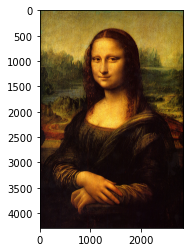

In [28]:
#Imagem Original
#Mudar BGR para RGB para mostrar a imagem em 3 cores
img_RBG = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imshow(img_RBG);

**Imagem Original no formato RGB**

In [29]:
#Shape dos dados 
img_RBG.shape

(4289, 2835, 3)

**Mesmo shape, porém no formato RGB**

In [30]:
#Ajustar imagem para 256 X 256 pixels
size = 1296
import_imag = []

#Alterar a dimensão
img1 = cv2.resize(img,(size,size))
#Nova dimensão
import_imag.append(img_to_array(img1))#Objeto no formato de lista
#Converter para o formato array
img_array = np.reshape(import_imag,(len(import_imag),size,size,3))

#Ajustar o ton da escala de cinza
img_novadim =img_array / 255

**Nesta etapa, quanto menos dimensões a imagem tiver comparado com a imagem original, menos nitida ela ficará**

**OBS: Quando mudar a dimensão dos dados, precisa ajustar a imagem em tons de cinza, que variam entre 0 a 255**

In [31]:
img_novadim.shape

(1, 1296, 1296, 3)

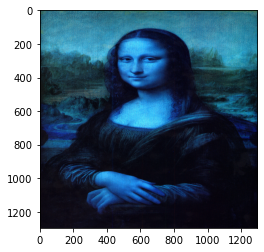

In [32]:
#Imagem com nova dimensão 256 X 256
imshow(img_novadim[0]);

**Veja que a nova dimensão de dados perdeu qualidade na imagem**

In [33]:
rrr = img_array.astype('float32')/255.

In [34]:
rrr.shape

(1, 1296, 1296, 3)

In [35]:
size

1296

## Modelagem

In [36]:
#Arquitetura da rede

#Encoder
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(size, size, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
#Decoder    
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1296, 1296, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 648, 648, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 648, 648, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 324, 324, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 324, 324, 8)       584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 162, 162, 8)      0

**Arquitetura completa da rede**

In [37]:
#Treinar o modelo
model.fit(img_novadim,img_novadim,epochs=30,shuffle=True,verbose=1)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 0.0967 - accuracy: 0.0075
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 0.0871 - accuracy: 0.0030
Epoch 3/30
1/1 [==============================] - 4s 4s/step - loss: 0.0732 - accuracy: 0.0033
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 0.0553 - accuracy: 0.0055
Epoch 5/30
1/1 [==============================] - 8s 8s/step - loss: 0.0368 - accuracy: 0.0130
Epoch 6/30
1/1 [==============================] - 8s 8s/step - loss: 0.0232 - accuracy: 0.0212
Epoch 7/30
1/1 [==============================] - 6s 6s/step - loss: 0.0190 - accuracy: 0.0316
Epoch 8/30
1/1 [==============================] - 6s 6s/step - loss: 0.0200 - accuracy: 0.7311
Epoch 9/30
1/1 [==============================] - 6s 6s/step - loss: 0.0174 - accuracy: 0.9725
Epoch 10/30
1/1 [==============================] - 6s 6s/step - loss: 0.0120 - accuracy: 0.9788
Epoch 11/30
1/1 [==============================] 

**Veja que a rede quase não comete erros na hora de reconstruir os atributos, e o valor da acurácia é quase perfeita**

In [38]:
#Previsão
pred = model.predict(img_novadim)
pred.shape

(1, 1296, 1296, 3)

**Note que a rede apesar da reconstrução, continua com as mesmas dimensões**

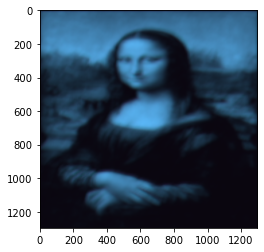

In [39]:
#Imagem reconstruida
imshow(pred[0].reshape(size,size,3));

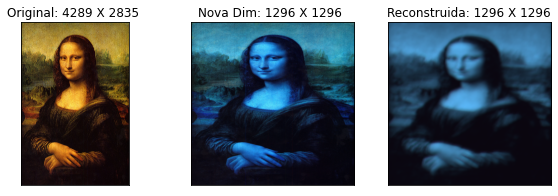

In [40]:
#Comparar as 3 imagens
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].imshow(img_RBG, cmap='Greys')
ax[0].set_title('Original: 4289 X 2835 ')
ax[1].imshow(img_novadim[0], cmap='Greys')
ax[1].set_title('Nova Dim: 1296 X 1296 ')
ax[2].imshow(pred[0], cmap='Greys')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[2].set_title('Reconstruida: 1296 X 1296')
plt.show()

**Apesar da imagem reconstruida não ter ficado nitida, ela conseguiu capturar as principais caracteristicas da imagem**